## Improving model accuracy

In this notebook we do transfer learning with different hyperparameters and data pre-processing to get better accuracy of the similar image searche.  The code saved here is from the best-performed models. We try different hyperparameters to achieve best accuracy. 

In [3]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.applications import ResNet50, ResNet50V2
from tensorflow.keras.applications import MobileNetV3Small
from sklearn.metrics import classification_report
from sklearn import metrics
from tensorflow.keras.optimizers import SGD

In [2]:
class_dict = {'dress':0 , 'hat':1, 'longsleeve':2, 'outwear':3, 'pants':4, 'shirt':5, 'shoes':6, 'shorts':7, 'skirt':8,'t-shirt':9}

First, we do fine-tunning of ResNet50V2 model without fully connected layers added on the top (for our specific RIS task):

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.
Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
       

 ormalization)                                                                                    
                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
          

                                                                                                  
 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 ization)                                                                                         
                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
          

                                                                                                  
 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_blo

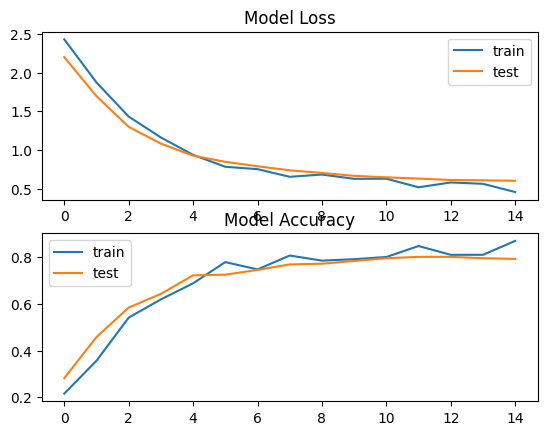

6/6 [==============================] - 20s 3s/step
              precision    recall  f1-score   support

           0       0.83      0.62      0.71        32
           1       0.93      0.93      0.93        14
           2       0.59      0.78      0.67        49
           3       0.76      0.67      0.71        24
           4       0.80      0.96      0.87        49
           5       0.68      0.66      0.67        29
           6       0.96      0.92      0.94        26
           7       0.76      0.52      0.62        25
           8       1.00      0.58      0.74        12
           9       0.89      0.90      0.90        81

    accuracy                           0.79       341
   macro avg       0.82      0.75      0.78       341
weighted avg       0.80      0.79      0.79       341



NameError: name 'class_dict' is not defined

In [6]:
# 1. freeze back-bone and train only last layers:

training_dataset_path = 'data\\train'
test_dataset_path = 'data\\validation'
path_to_save_model = 'model\\transfer_learning'
model_name_to_save = 'best_base_resnet_freezed.hdf5'
model_name_to_load = 'best_base_resnet_freezed.hdf5'
os.makedirs(path_to_save_model, exist_ok=True)
image_size = (224, 224)
batch_size = 64
epochs = 15
lr = 0.001


train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
        training_dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

    
test_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1. / 255)
    
test_generator = test_datagen.flow_from_directory(
        test_dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

steps_per_epoch = int(np.floor(test_generator.samples / batch_size))

# Base model
base_model = ResNet50V2(weights='imagenet', include_top=False,
                        input_tensor=layers.Input(shape=image_size + (3,)))

base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)
    
model.summary()

checkpoint = keras.callbacks.ModelCheckpoint(filepath=os.path.join(path_to_save_model, model_name_to_save), 
                                             monitor='val_loss',save_best_only=True, mode=min)

# Compiling the CNN
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr), metrics=['acc'])

# Fitting the CNN
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator, steps_per_epoch=steps_per_epoch, 
                    callbacks=[checkpoint])

# plot loss during training
plt.subplot(211)
plt.title('Model Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Model Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

tf.keras.backend.clear_session()

model = keras.models.load_model(os.path.join(path_to_save_model, model_name_to_save))
predicted_classes = model.predict(test_generator, verbose=1)

predicted_classes = [np.argmax(pred) for pred in predicted_classes]
gt_classes = test_generator.classes

print(classification_report(gt_classes, predicted_classes))
confusion_matrix = metrics.confusion_matrix(gt_classes, predicted_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=list(class_dict.keys()))
cm_display.plot()
plt.show()

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.
Epoch 1/30
5/5 [==============================] - 90s 17s/step - loss: 0.5201 - acc: 0.8250 - val_loss: 0.5483 - val_acc: 0.8211
Epoch 2/30
5/5 [==============================] - 79s 17s/step - loss: 0.3673 - acc: 0.8829 - val_loss: 0.4937 - val_acc: 0.8387
Epoch 3/30
5/5 [==============================] - 80s 17s/step - loss: 0.3098 - acc: 0.8969 - val_loss: 0.4402 - val_acc: 0.8358
Epoch 4/30
5/5 [==============================] - 79s 17s/step - loss: 0.2488 - acc: 0.9019 - val_loss: 0.4193 - val_acc: 0.8563
Epoch 5/30
5/5 [==============================] - 81s 17s/step - loss: 0.2279 - acc: 0.9312 - val_loss: 0.4239 - val_acc: 0.8534
Epoch 6/30
5/5 [==============================] - 87s 18s/step - loss: 0.3270 - acc: 0.8969 - val_loss: 0.3989 - val_acc: 0.8622
Epoch 7/30
5/5 [==============================] - 87s 18s/step - loss: 0.2175 - acc: 0.9312 - val_loss: 0.3998 - val_acc: 0.8622
Epoch 8/30
5

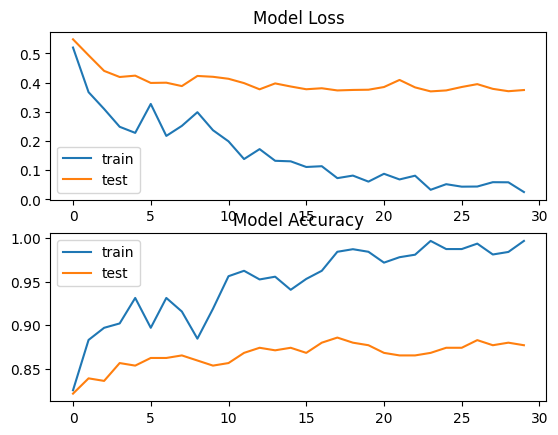

6/6 [==============================] - 28s 4s/step
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        32
           1       0.93      1.00      0.97        14
           2       0.82      0.82      0.82        49
           3       0.70      0.79      0.75        24
           4       0.88      0.94      0.91        49
           5       0.80      0.83      0.81        29
           6       0.96      0.96      0.96        26
           7       0.87      0.80      0.83        25
           8       1.00      0.75      0.86        12
           9       0.93      0.93      0.93        81

    accuracy                           0.87       341
   macro avg       0.87      0.86      0.86       341
weighted avg       0.87      0.87      0.87       341



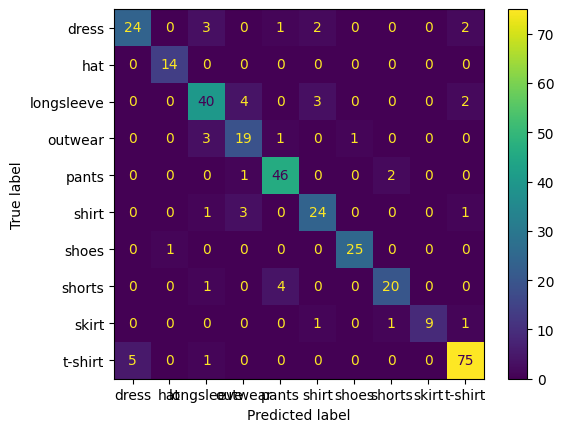

In [9]:
# 2. unfreeze layers and train them:

model_name_to_save = 'best_base_resnet_unfreezed.hdf5'
image_size = (224, 224)
batch_size = 64
epochs = 30
lr = 0.00001

# Base model
base_model = ResNet50V2(weights='imagenet', include_top=False,
                        input_tensor=layers.Input(shape=image_size + (3,)))


base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

# load weights
model.load_weights(os.path.join(path_to_save_model, model_name_to_load))

for layer in model.layers:
    if not isinstance(layer, keras.layers.BatchNormalization):
        layer.trainable = True

model.summary()


checkpoint = keras.callbacks.ModelCheckpoint(filepath=os.path.join(path_to_save_model, model_name_to_save), monitor='val_loss',
                                             save_best_only=True, mode=min)

# Compiling the CNN
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr), metrics=['acc'])

# Fitting the CNN
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator, steps_per_epoch=steps_per_epoch,
                    callbacks=[checkpoint])

# plot loss during training
plt.subplot(211)
plt.title('Model Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Model Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

tf.keras.backend.clear_session()

model = keras.models.load_model(os.path.join(path_to_save_model, model_name_to_save))
predicted_classes = model.predict(test_generator, verbose=1)

predicted_classes = [np.argmax(pred) for pred in predicted_classes]
gt_classes = test_generator.classes

print(classification_report(gt_classes, predicted_classes))
confusion_matrix = metrics.confusion_matrix(gt_classes, predicted_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=list(class_dict.keys()))
cm_display.plot()
plt.show()

To get better results, we add some augmentation to the data:

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
         

 ormalization)                                                                                    
                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
          

                                                                                                  
 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 ization)                                                                                         
                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
          

                                                                                                  
 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_blo

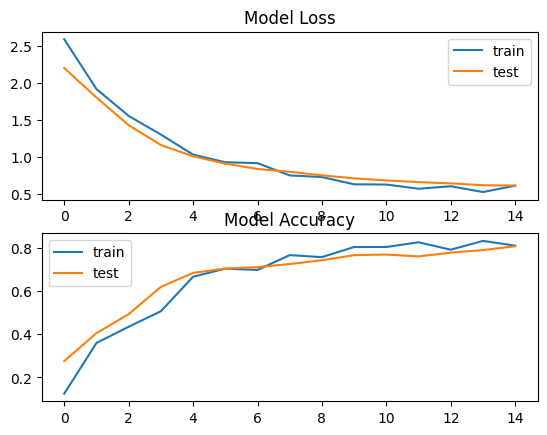

6/6 [==============================] - 25s 4s/step
              precision    recall  f1-score   support

           0       0.88      0.47      0.61        32
           1       0.91      0.71      0.80        14
           2       0.67      0.76      0.71        49
           3       0.68      0.71      0.69        24
           4       0.87      0.96      0.91        49
           5       0.65      0.76      0.70        29
           6       0.93      0.96      0.94        26
           7       0.94      0.64      0.76        25
           8       0.89      0.67      0.76        12
           9       0.85      0.96      0.90        81

    accuracy                           0.81       341
   macro avg       0.83      0.76      0.78       341
weighted avg       0.82      0.81      0.80       341



NameError: name 'class_dict' is not defined

In [2]:
# 1. freeze back-bone and train only last layers:

training_dataset_path = 'data\\train'
test_dataset_path = 'data\\validation'
path_to_save_model = 'model\\transfer_learning'
model_name_to_save = 'best_base_resnet_freezed_augmented.hdf5'
model_name_to_load = 'best_base_resnet_freezed_augmented.hdf5'
os.makedirs(path_to_save_model, exist_ok=True)
image_size = (224, 224)
batch_size = 64
epochs = 15
lr = 0.001


train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1. / 255,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.05)

train_generator = train_datagen.flow_from_directory(
        training_dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

    
test_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1. / 255)
    
test_generator = test_datagen.flow_from_directory(
        test_dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

steps_per_epoch = int(np.floor(test_generator.samples / batch_size))

# Base model
base_model = ResNet50V2(weights='imagenet', include_top=False,
                        input_tensor=layers.Input(shape=image_size + (3,)))

base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)
    
model.summary()

checkpoint = keras.callbacks.ModelCheckpoint(filepath=os.path.join(path_to_save_model, model_name_to_save), 
                                             monitor='val_loss',save_best_only=True, mode=min)

# Compiling the CNN
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr), metrics=['acc'])

# Fitting the CNN
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator, steps_per_epoch=steps_per_epoch, 
                    callbacks=[checkpoint])

# plot loss during training
plt.subplot(211)
plt.title('Model Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Model Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

tf.keras.backend.clear_session()

model = keras.models.load_model(os.path.join(path_to_save_model, model_name_to_save))
predicted_classes = model.predict(test_generator, verbose=1)

predicted_classes = [np.argmax(pred) for pred in predicted_classes]
gt_classes = test_generator.classes

print(classification_report(gt_classes, predicted_classes))
confusion_matrix = metrics.confusion_matrix(gt_classes, predicted_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=list(class_dict.keys()))
cm_display.plot()
plt.show()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 7, 7, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 7, 7, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

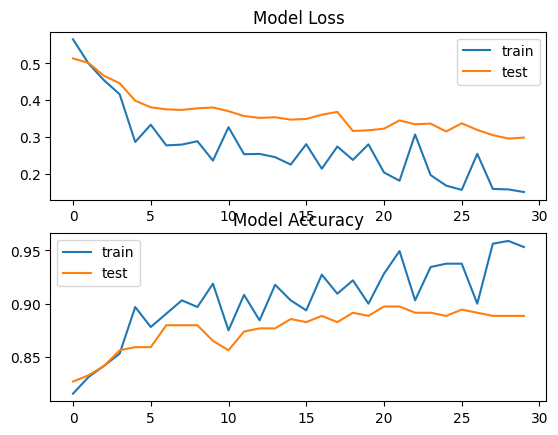

6/6 [==============================] - 25s 4s/step
              precision    recall  f1-score   support

           0       0.96      0.78      0.86        32
           1       1.00      1.00      1.00        14
           2       0.82      0.86      0.84        49
           3       0.73      0.92      0.81        24
           4       0.96      0.94      0.95        49
           5       0.79      0.76      0.77        29
           6       0.93      1.00      0.96        26
           7       0.81      0.88      0.85        25
           8       1.00      0.67      0.80        12
           9       0.94      0.94      0.94        81

    accuracy                           0.89       341
   macro avg       0.89      0.87      0.88       341
weighted avg       0.89      0.89      0.89       341



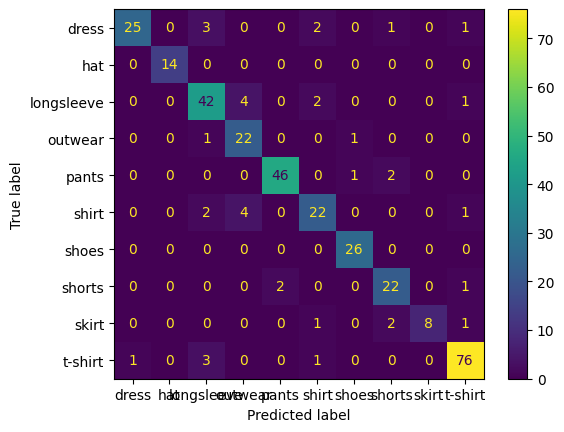

In [7]:
# 2. unfreeze layers and train them:

model_name_to_save = 'best_base_resnet_unfreezed_augmented.hdf5'
image_size = (224, 224)
batch_size = 64
epochs = 30
lr = 0.00001


# Base model
base_model = ResNet50V2(weights='imagenet', include_top=False,
                        input_tensor=layers.Input(shape=image_size + (3,)))


base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

# load weights
model.load_weights(os.path.join(path_to_save_model, model_name_to_load))

for layer in model.layers:
    if not isinstance(layer, keras.layers.BatchNormalization):
        layer.trainable = True

model.summary()


checkpoint = keras.callbacks.ModelCheckpoint(filepath=os.path.join(path_to_save_model, model_name_to_save), monitor='val_loss',
                                             save_best_only=True, mode=min)

# Compiling the CNN
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr), metrics=['acc'])

# Fitting the CNN
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator, steps_per_epoch=steps_per_epoch,
                    callbacks=[checkpoint])

# plot loss during training
plt.subplot(211)
plt.title('Model Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Model Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

tf.keras.backend.clear_session()

model = keras.models.load_model(os.path.join(path_to_save_model, model_name_to_save))
predicted_classes = model.predict(test_generator, verbose=1)

predicted_classes = [np.argmax(pred) for pred in predicted_classes]
gt_classes = test_generator.classes

print(classification_report(gt_classes, predicted_classes))
confusion_matrix = metrics.confusion_matrix(gt_classes, predicted_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=list(class_dict.keys()))
cm_display.plot()
plt.show()

We also try to add fully connected layers and check, if this model is really worse than the one without any fully-connected layers:

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
         

 ormalization)                                                                                    
                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
          

                                                                                                  
 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 ization)                                                                                         
                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
          

                                                                                                  
 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_blo

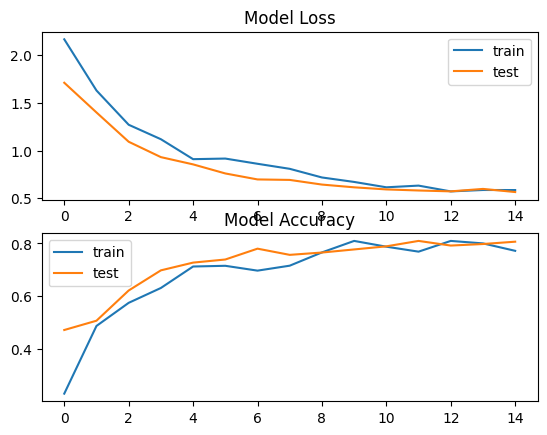

6/6 [==============================] - 21s 3s/step
              precision    recall  f1-score   support

           0       0.88      0.44      0.58        32
           1       0.87      0.93      0.90        14
           2       0.70      0.80      0.74        49
           3       0.84      0.67      0.74        24
           4       0.82      0.96      0.89        49
           5       0.61      0.69      0.65        29
           6       0.96      0.96      0.96        26
           7       0.84      0.64      0.73        25
           8       0.73      0.67      0.70        12
           9       0.87      0.95      0.91        81

    accuracy                           0.81       341
   macro avg       0.81      0.77      0.78       341
weighted avg       0.81      0.81      0.80       341



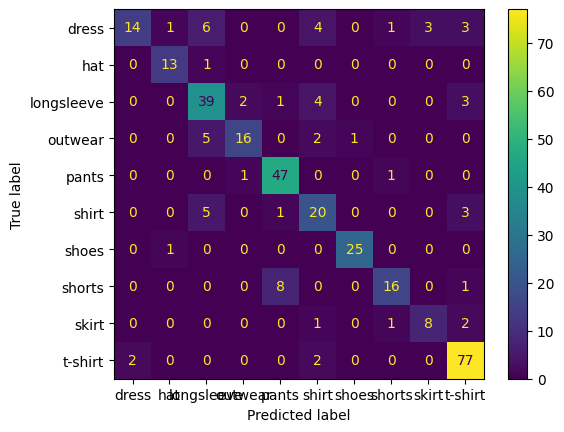

In [4]:
# 1. freeze back-bone and train only last layers:

training_dataset_path = 'data\\train'
test_dataset_path = 'data\\validation'
path_to_save_model = 'model\\transfer_learning'
model_name_to_save = 'best_base_resnet_freezed_fully_conn_0.2_dropout.hdf5'
model_name_to_load = 'best_base_resnet_freezed_fully_conn_0.2_dropout.hdf5'
os.makedirs(path_to_save_model, exist_ok=True)
image_size = (224, 224)
batch_size = 64
epochs = 15
lr = 0.001


train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
        training_dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

    
test_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1. / 255)
    
test_generator = test_datagen.flow_from_directory(
        test_dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

steps_per_epoch = int(np.floor(test_generator.samples / batch_size))

# Base model
base_model = ResNet50V2(weights='imagenet', include_top=False,
                        input_tensor=layers.Input(shape=image_size + (3,)))

base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)  # Add a fully connected layer with 128 units and ReLU activation
x = layers.Dropout(0.2)(x)  # Add a dropout layer with a rate of 0.2
x = layers.Dense(64, activation='relu')(x)   # Add another fully connected layer with 64 units and ReLU activation
x = layers.Dropout(0.2)(x)  # Add another dropout layer with a rate of 0.2
x = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)
    
model.summary()

checkpoint = keras.callbacks.ModelCheckpoint(filepath=os.path.join(path_to_save_model, model_name_to_save), 
                                             monitor='val_loss',save_best_only=True, mode=min)

# Compiling the CNN
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr), metrics=['acc'])

# Fitting the CNN
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator, steps_per_epoch=steps_per_epoch, 
                    callbacks=[checkpoint])

# plot loss during training
plt.subplot(211)
plt.title('Model Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Model Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

tf.keras.backend.clear_session()

model = keras.models.load_model(os.path.join(path_to_save_model, model_name_to_save))
predicted_classes = model.predict(test_generator, verbose=1)

predicted_classes = [np.argmax(pred) for pred in predicted_classes]
gt_classes = test_generator.classes

print(classification_report(gt_classes, predicted_classes))
confusion_matrix = metrics.confusion_matrix(gt_classes, predicted_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=list(class_dict.keys()))
cm_display.plot()
plt.show()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 7, 7, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 7, 7, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

5/5 [==============================] - 98s 21s/step - loss: 0.2108 - acc: 0.9344 - val_loss: 0.3696 - val_acc: 0.8680
Epoch 20/30
5/5 [==============================] - 100s 21s/step - loss: 0.2208 - acc: 0.9344 - val_loss: 0.3869 - val_acc: 0.8622
Epoch 21/30
5/5 [==============================] - 101s 21s/step - loss: 0.1757 - acc: 0.9406 - val_loss: 0.3872 - val_acc: 0.8768
Epoch 22/30
5/5 [==============================] - 98s 21s/step - loss: 0.1654 - acc: 0.9406 - val_loss: 0.3823 - val_acc: 0.8798
Epoch 23/30
5/5 [==============================] - 102s 22s/step - loss: 0.2313 - acc: 0.9250 - val_loss: 0.3369 - val_acc: 0.8827
Epoch 24/30
5/5 [==============================] - 96s 20s/step - loss: 0.1243 - acc: 0.9781 - val_loss: 0.3453 - val_acc: 0.8739
Epoch 25/30
5/5 [==============================] - 94s 20s/step - loss: 0.1963 - acc: 0.9281 - val_loss: 0.3409 - val_acc: 0.8827
Epoch 26/30
5/5 [==============================] - 92s 19s/step - loss: 0.2273 - acc: 0.9344 - val_

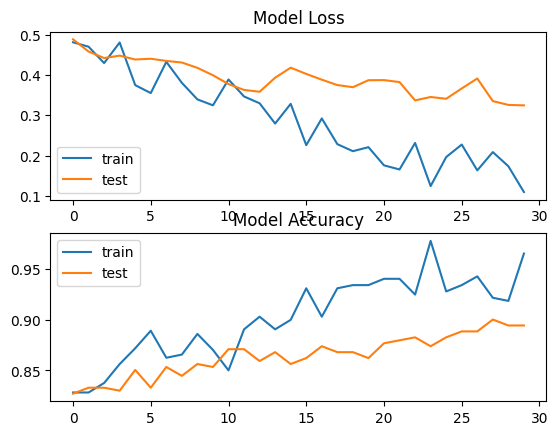

6/6 [==============================] - 20s 3s/step
              precision    recall  f1-score   support

           0       0.88      0.72      0.79        32
           1       1.00      1.00      1.00        14
           2       0.87      0.84      0.85        49
           3       0.76      0.92      0.83        24
           4       0.90      0.94      0.92        49
           5       0.83      0.86      0.85        29
           6       0.96      1.00      0.98        26
           7       0.80      0.80      0.80        25
           8       0.92      0.92      0.92        12
           9       0.96      0.95      0.96        81

    accuracy                           0.89       341
   macro avg       0.89      0.89      0.89       341
weighted avg       0.90      0.89      0.89       341



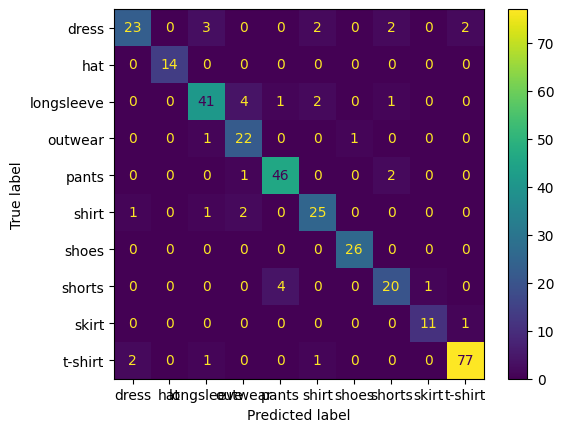

In [7]:
# 2. unfreeze layers and train them:

model_name_to_save = 'best_base_resnet_unfreezed_fully_conn_0.2_dropout.hdf5'
image_size = (224, 224)
batch_size = 64
epochs = 30
lr = 0.00001


# Base model
base_model = ResNet50V2(weights='imagenet', include_top=False,
                        input_tensor=layers.Input(shape=image_size + (3,)))


base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(128, activation='relu')(x)  # Add a fully connected layer with 128 units and ReLU activation
x = layers.Dropout(0.2)(x)  # Add a dropout layer with a rate of 0.2
x = layers.Dense(64, activation='relu')(x)   # Add another fully connected layer with 64 units and ReLU activation
x = layers.Dropout(0.2)(x)  # Add another dropout layer with a rate of 0.2
x = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

# load weights
model.load_weights(os.path.join(path_to_save_model, model_name_to_load))

for layer in model.layers:
    if not isinstance(layer, keras.layers.BatchNormalization):
        layer.trainable = True

model.summary()


checkpoint = keras.callbacks.ModelCheckpoint(filepath=os.path.join(path_to_save_model, model_name_to_save), monitor='val_loss',
                                             save_best_only=True, mode=min)

# Compiling the CNN
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr), metrics=['acc'])

# Fitting the CNN
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator, steps_per_epoch=steps_per_epoch,
                    callbacks=[checkpoint])

# plot loss during training
plt.subplot(211)
plt.title('Model Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Model Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

tf.keras.backend.clear_session()

model = keras.models.load_model(os.path.join(path_to_save_model, model_name_to_save))
predicted_classes = model.predict(test_generator, verbose=1)

predicted_classes = [np.argmax(pred) for pred in predicted_classes]
gt_classes = test_generator.classes

print(classification_report(gt_classes, predicted_classes))
confusion_matrix = metrics.confusion_matrix(gt_classes, predicted_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=list(class_dict.keys()))
cm_display.plot()
plt.show()

We got best accuracy for RIS task with fine-tuned model where data augmentations were used. 

Retrain best model with bigger train data set (train + validation) with the same hyperparameters:

Found 3409 images belonging to 10 classes.
Found 372 images belonging to 10 classes.
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
         

 ormalization)                                                                                    
                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
          

                                                                                                  
 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
          

                                                                                                  
 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_blo

 ization)                                                                                         
                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
          

                                                                                                  
 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_blo

 n)                                                                                               
                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_blo

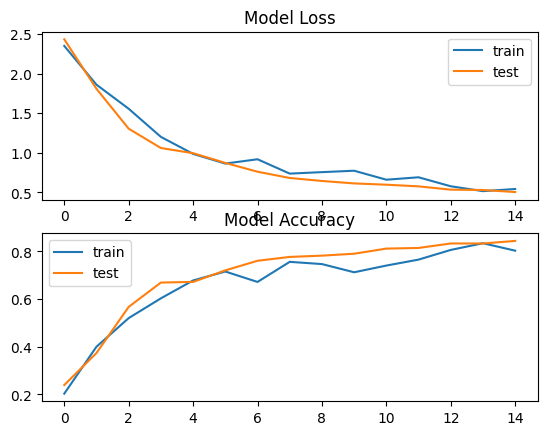

6/6 [==============================] - 22s 4s/step
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       0.71      0.83      0.77        12
           2       0.73      0.85      0.78        72
           3       0.86      0.66      0.75        38
           4       0.95      1.00      0.98        42
           5       0.71      0.58      0.64        26
           6       1.00      0.95      0.97        73
           7       0.77      0.90      0.83        30
           8       0.88      0.58      0.70        12
           9       0.85      0.88      0.87        52

    accuracy                           0.84       372
   macro avg       0.83      0.80      0.81       372
weighted avg       0.85      0.84      0.84       372



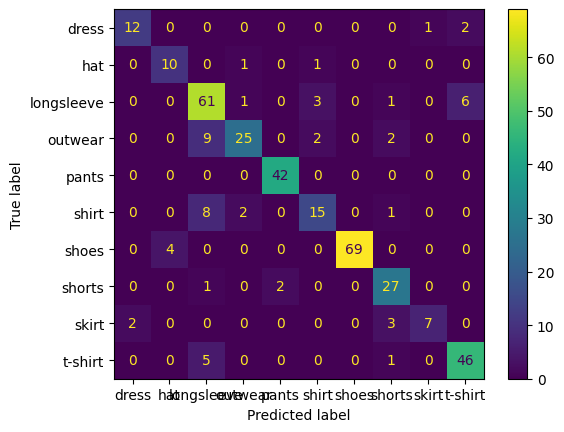

In [8]:
# 1. freeze back-bone and train only last layers:

training_dataset_path = 'data\\train_val'
test_dataset_path = 'data\\test'
path_to_save_model = 'model\\transfer_learning'
model_name_to_save = 'best_base_resnet_freezed_augmented_retrained.hdf5'
model_name_to_load = 'best_base_resnet_freezed_augmented_retrained.hdf5'
os.makedirs(path_to_save_model, exist_ok=True)
image_size = (224, 224)
batch_size = 64
epochs = 15
lr = 0.001


train_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1. / 255,
        horizontal_flip=True,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.05)

train_generator = train_datagen.flow_from_directory(
        training_dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical')

    
test_datagen = keras.preprocessing.image.ImageDataGenerator(
        rescale=1. / 255)
    
test_generator = test_datagen.flow_from_directory(
        test_dataset_path,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='categorical',
        shuffle=False)

steps_per_epoch = int(np.floor(test_generator.samples / batch_size))

# Base model
base_model = ResNet50V2(weights='imagenet', include_top=False,
                        input_tensor=layers.Input(shape=image_size + (3,)))

base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)
    
model.summary()

checkpoint = keras.callbacks.ModelCheckpoint(filepath=os.path.join(path_to_save_model, model_name_to_save), 
                                             monitor='val_loss',save_best_only=True, mode=min)

# Compiling the CNN
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr), metrics=['acc'])

# Fitting the CNN
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator, steps_per_epoch=steps_per_epoch, 
                    callbacks=[checkpoint])

# plot loss during training
plt.subplot(211)
plt.title('Model Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Model Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

tf.keras.backend.clear_session()

model = keras.models.load_model(os.path.join(path_to_save_model, model_name_to_save))
predicted_classes = model.predict(test_generator, verbose=1)

predicted_classes = [np.argmax(pred) for pred in predicted_classes]
gt_classes = test_generator.classes

print(classification_report(gt_classes, predicted_classes))
confusion_matrix = metrics.confusion_matrix(gt_classes, predicted_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=list(class_dict.keys()))
cm_display.plot()
plt.show()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

                                                                                                  
 conv2_block3_preact_relu (Acti  (None, 56, 56, 256)  0          ['conv2_block3_preact_bn[0][0]'] 
 vation)                                                                                          
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, 56, 56, 64)   16384       ['conv2_block3_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv2_block3_1_bn (BatchNormal  (None, 56, 56, 64)  256         ['conv2_block3_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv2_blo

 conv3_block2_2_conv (Conv2D)   (None, 28, 28, 128)  147456      ['conv3_block2_2_pad[0][0]']     
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, 28, 28, 128)  512        ['conv3_block2_2_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, 28, 28, 128)  0          ['conv3_block2_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, 28, 28, 512)  66048       ['conv3_block2_2_relu[0][0]']    
                                                                                                  
 conv3_blo

 conv4_block1_1_conv (Conv2D)   (None, 14, 14, 256)  131072      ['conv4_block1_preact_relu[0][0]'
                                                                 ]                                
                                                                                                  
 conv4_block1_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block1_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block1_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block1_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block1_1_relu[0][0]']    
 g2D)     

                                                                                                  
 conv4_block3_2_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block3_2_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block3_3_conv (Conv2D)   (None, 14, 14, 1024  263168      ['conv4_block3_2_relu[0][0]']    
                                )                                                                 
                                                                                                  
 conv4_block3_out (Add)         (None, 14, 14, 1024  0           ['conv4_block2_out[0][0]',       
                                )                                 'conv4_block3_3_conv[0][0]']    
                                                                                                  
 conv4_blo

 conv4_block6_1_bn (BatchNormal  (None, 14, 14, 256)  1024       ['conv4_block6_1_conv[0][0]']    
 ization)                                                                                         
                                                                                                  
 conv4_block6_1_relu (Activatio  (None, 14, 14, 256)  0          ['conv4_block6_1_bn[0][0]']      
 n)                                                                                               
                                                                                                  
 conv4_block6_2_pad (ZeroPaddin  (None, 16, 16, 256)  0          ['conv4_block6_1_relu[0][0]']    
 g2D)                                                                                             
                                                                                                  
 conv4_block6_2_conv (Conv2D)   (None, 7, 7, 256)    589824      ['conv4_block6_2_pad[0][0]']     
          

                                                                                                  
 conv5_block2_3_conv (Conv2D)   (None, 7, 7, 2048)   1050624     ['conv5_block2_2_relu[0][0]']    
                                                                                                  
 conv5_block2_out (Add)         (None, 7, 7, 2048)   0           ['conv5_block1_out[0][0]',       
                                                                  'conv5_block2_3_conv[0][0]']    
                                                                                                  
 conv5_block3_preact_bn (BatchN  (None, 7, 7, 2048)  8192        ['conv5_block2_out[0][0]']       
 ormalization)                                                                                    
                                                                                                  
 conv5_block3_preact_relu (Acti  (None, 7, 7, 2048)  0           ['conv5_block3_preact_bn[0][0]'] 
 vation)  

5/5 [==============================] - 98s 21s/step - loss: 0.2046 - acc: 0.9406 - val_loss: 0.2532 - val_acc: 0.9032
Epoch 26/30
5/5 [==============================] - 96s 20s/step - loss: 0.1602 - acc: 0.9375 - val_loss: 0.2436 - val_acc: 0.9140
Epoch 27/30
5/5 [==============================] - 86s 17s/step - loss: 0.1514 - acc: 0.9560 - val_loss: 0.2277 - val_acc: 0.9194
Epoch 28/30
5/5 [==============================] - 94s 20s/step - loss: 0.1894 - acc: 0.9156 - val_loss: 0.2345 - val_acc: 0.9113
Epoch 29/30
5/5 [==============================] - 95s 20s/step - loss: 0.1853 - acc: 0.9281 - val_loss: 0.2389 - val_acc: 0.9140
Epoch 30/30
5/5 [==============================] - 96s 20s/step - loss: 0.1241 - acc: 0.9656 - val_loss: 0.2529 - val_acc: 0.9167


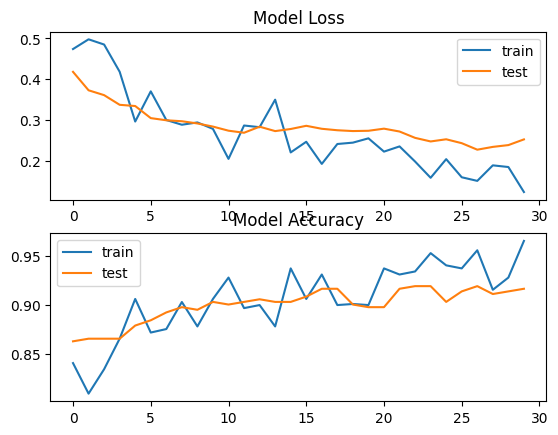

6/6 [==============================] - 23s 4s/step
              precision    recall  f1-score   support

           0       0.86      0.80      0.83        15
           1       1.00      0.92      0.96        12
           2       0.83      0.89      0.86        72
           3       0.89      0.89      0.89        38
           4       0.98      1.00      0.99        42
           5       0.87      0.77      0.82        26
           6       1.00      1.00      1.00        73
           7       0.97      0.97      0.97        30
           8       0.83      0.83      0.83        12
           9       0.92      0.90      0.91        52

    accuracy                           0.92       372
   macro avg       0.92      0.90      0.91       372
weighted avg       0.92      0.92      0.92       372



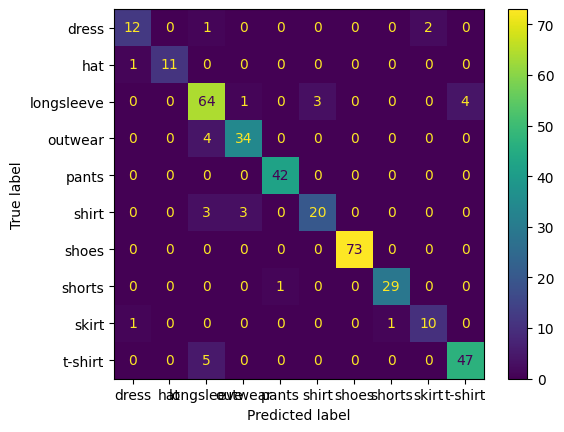

In [9]:
# 2. unfreeze layers and train them:

model_name_to_save = 'best_base_resnet_unfreezed_augmented_retrained.hdf5'
image_size = (224, 224)
batch_size = 64
epochs = 30
lr = 0.00001


# Base model
base_model = ResNet50V2(weights='imagenet', include_top=False,
                        input_tensor=layers.Input(shape=image_size + (3,)))


base_model.trainable = False

x = layers.GlobalAveragePooling2D()(base_model.output)
x = layers.Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=x)

# load weights
model.load_weights(os.path.join(path_to_save_model, model_name_to_load))

for layer in model.layers:
    if not isinstance(layer, keras.layers.BatchNormalization):
        layer.trainable = True

model.summary()


checkpoint = keras.callbacks.ModelCheckpoint(filepath=os.path.join(path_to_save_model, model_name_to_save), monitor='val_loss',
                                             save_best_only=True, mode=min)

# Compiling the CNN
model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=lr), metrics=['acc'])

# Fitting the CNN
history = model.fit(train_generator, epochs=epochs, validation_data=test_generator, steps_per_epoch=steps_per_epoch,
                    callbacks=[checkpoint])

# plot loss during training
plt.subplot(211)
plt.title('Model Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
# plot accuracy during training
plt.subplot(212)
plt.title('Model Accuracy')
plt.plot(history.history['acc'], label='train')
plt.plot(history.history['val_acc'], label='test')
plt.legend()
plt.show()

tf.keras.backend.clear_session()

model = keras.models.load_model(os.path.join(path_to_save_model, model_name_to_save))
predicted_classes = model.predict(test_generator, verbose=1)

predicted_classes = [np.argmax(pred) for pred in predicted_classes]
gt_classes = test_generator.classes

print(classification_report(gt_classes, predicted_classes))
confusion_matrix = metrics.confusion_matrix(gt_classes, predicted_classes)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=list(class_dict.keys()))
cm_display.plot()
plt.show()

Our model is not overfitting and it also works good on the test data set.